In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
df = pd.read_csv("google_stock_prices.csv")

In [4]:
# Extract Close prices
data = df['Close'].values.reshape(-1, 1)

In [5]:
# Step 3: Preprocess the Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [6]:
# Create sequences for input to RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [7]:
seq_length = 20  # Number of time steps to look back
X, y = create_sequences(scaled_data, seq_length)

In [8]:
# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [10]:
# Step 4: Build the RNN Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50, return_sequences=False),
    Dense(units=1)
])

In [11]:
# Step 5: Train the Model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10

95/95 [==============================] - 3s 8ms/step - loss: 0.0029
Epoch 2/10
95/95 [==============================] - 1s 8ms/step - loss: 1.4716e-04
Epoch 3/10
95/95 [==============================] - 1s 8ms/step - loss: 1.4733e-04
Epoch 4/10
95/95 [==============================] - 1s 8ms/step - loss: 1.4482e-04
Epoch 5/10
95/95 [==============================] - 1s 8ms/step - loss: 1.3825e-04
Epoch 6/10
95/95 [==============================] - 1s 8ms/step - loss: 1.2903e-04
Epoch 7/10
95/95 [==============================] - 1s 8ms/step - loss: 1.2985e-04
Epoch 8/10
95/95 [==============================] - 1s 8ms/step - loss: 1.2964e-04
Epoch 9/10
95/95 [==============================] - 1s 8ms/step - loss: 1.1544e-04
Epoch 10/10
95/95 [==============================] - 1s 8ms/step - loss: 1.2280e-04


In [12]:
# Step 6: Evaluate the Model
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

24/24 [==============================] - 1s 3ms/step - loss: 5.1032e-04
Test Loss: 0.0005103181465528905


In [13]:
# Step 7: Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

24/24 [==============================] - 1s 3ms/step


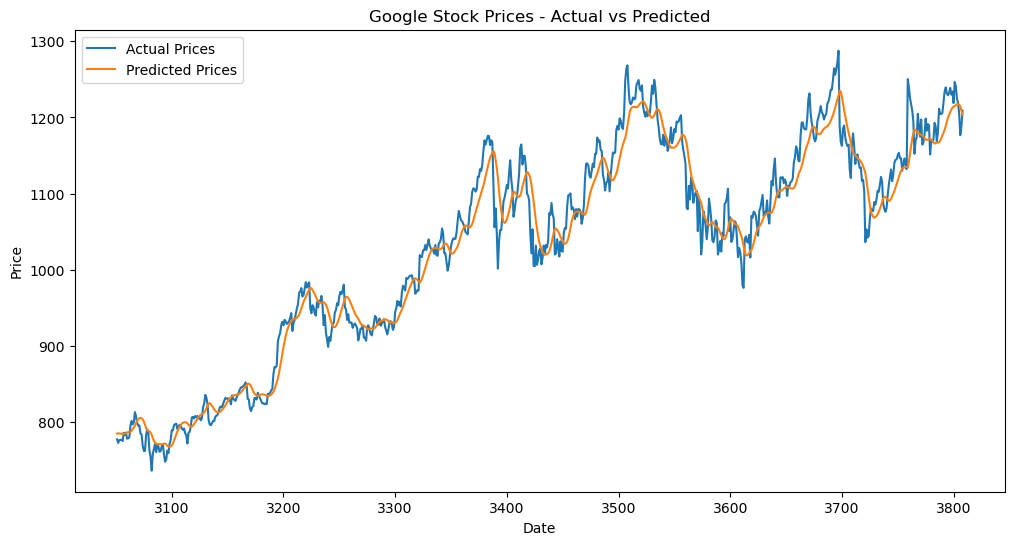

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[split+seq_length:], df['Close'][split+seq_length:], label='Actual Prices')
plt.plot(df.index[split+seq_length:], predictions, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Google Stock Prices - Actual vs Predicted')
plt.legend()
plt.show()